**Alumno: Rodolfo Nicolás Velasco Fessler**


Paso 1: Instalación e importación de librerías

In [16]:
# Instalar/actualizar librerías (opcional pero recomendado)
!pip install -q pandas numpy matplotlib seaborn scikit-learn

# Importaciones generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importaciones de Scikit-Learn para Fase 3, 5 y 6
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Importación de Google Colab para subir archivos
from google.colab import files

# Configuraciones de visualización
pd.set_option('display.max_columns', 10)
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

print("Librerías importadas exitosamente.")

Librerías importadas exitosamente.


Paso 2: Cargar el Data Set

In [17]:
# Pedir al usuario que suba el archivo
print("Por favor, sube tu archivo 'datos_originales.csv'")
uploaded = files.upload()

# Obtener el nombre del archivo (debería ser 'datos_originales.csv')
file_path = list(uploaded.keys())[0]
print(f"Archivo '{file_path}' cargado exitosamente.")

# Cargar el archivo en un DataFrame principal
try:
    datos_originales = pd.read_csv(file_path)
    print("\nDataFrame 'datos_originales' creado.")
    datos_originales.head()
except Exception as e:
    print(f"Error al leer el CSV: {e}")

Por favor, sube tu archivo 'datos_originales.csv'


Saving datos_originales.csv to datos_originales (1).csv
Archivo 'datos_originales (1).csv' cargado exitosamente.

DataFrame 'datos_originales' creado.


Paso 3: generar las estadísticas descriptivas **(FASE 2)**

In [18]:
#@title Fase 2: Estadísticas Descriptivas
print("--- Fase 2: Comprensión de los Datos ---")

# 3. Calcula todas las estadísticas automáticamente
# Usamos el DataFrame 'datos_originales' que cargamos en la celda anterior
estadisticas = datos_originales.describe()

# 4. Vamos a mostrar hasta dos decimales
estadisticas = estadisticas.round(2)

# 5. Imprime los resultados en la consola
print(estadisticas)

# Resetear la opción de visualización
pd.reset_option('display.max_columns')

--- Fase 2: Comprensión de los Datos ---
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20640.00  20640.00            20640.00     20640.00        20433.00   
mean     -119.57     35.63               28.64      2635.76          537.87   
std         2.00      2.14               12.59      2181.62          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1447.75          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.71               37.00      3148.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20640.00    20640.00       20640.00            20640.00  
mean      1425.48      499.54           3.87           206855.82  
std       1132.46      382.33           1.90  

Paso 4: Creación del Dataset Limpio **(FASE 3)**

In [19]:
#@title Fase 3 (Parte 1): Creación de 'datos_limpios.csv'
print("\n--- Fase 3 (Parte 1): Creando Dataset Limpio ---")

# Usaremos una copia del DataFrame original
datos_originales_processed = datos_originales.copy()

# 1. Tratamiento de valores faltantes (total_bedrooms)
median_bedrooms = datos_originales_processed['total_bedrooms'].median()
datos_originales_processed['total_bedrooms'].fillna(median_bedrooms, inplace=True)
print(f"Valores nulos en 'total_bedrooms' rellenados con la mediana: {median_bedrooms}")
missing_after = datos_originales_processed['total_bedrooms'].isnull().sum()
print(f"Valores nulos restantes en 'total_bedrooms': {missing_after}")
print("\n" + "="*40 + "\n")

# 2. Creación de variables derivadas (Feature Engineering)
datos_originales_processed['rooms_per_household'] = datos_originales_processed['total_rooms'] / datos_originales_processed['households']
datos_originales_processed['bedrooms_per_room'] = datos_originales_processed['total_bedrooms'] / datos_originales_processed['total_rooms']
datos_originales_processed['population_per_household'] = datos_originales_processed['population'] / datos_originales_processed['households']
print("Nuevas características creadas: 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'")

# 3. Procesamiento de variable categórica (ocean_proximity)
datos_originales_processed = pd.get_dummies(datos_originales_processed, columns=['ocean_proximity'], prefix='ocean_proximity')
print("Variable 'ocean_proximity' convertida con One-Hot Encoding.")

# 4. Limpieza de columnas originales redundantes
cols_to_drop = ['total_rooms', 'total_bedrooms', 'population', 'households']
datos_originales_processed.drop(cols_to_drop, axis=1, inplace=True)
print(f"Columnas originales {cols_to_drop} eliminadas.")

print("\nInformación del dataset limpio y procesado:")
datos_originales_processed.info()

# 5. Guardar el dataset limpio (lo usará la Fase 5)
clean_file_name = 'datos_limpios.csv'
datos_originales_processed.to_csv(clean_file_name, index=False)
print(f"\n¡Éxito! Dataset limpio guardado como: {clean_file_name}")

from google.colab import files

# Este comando le pedirá a tu navegador que descargue el archivo
print("Iniciando la descarga de 'datos_limpios.csv'...")
files.download('datos_limpios.csv')


--- Fase 3 (Parte 1): Creando Dataset Limpio ---
Valores nulos en 'total_bedrooms' rellenados con la mediana: 435.0
Valores nulos restantes en 'total_bedrooms': 0


Nuevas características creadas: 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
Variable 'ocean_proximity' convertida con One-Hot Encoding.
Columnas originales ['total_rooms', 'total_bedrooms', 'population', 'households'] eliminadas.

Información del dataset limpio y procesado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   median_income               20640 non-null  float64
 4   median_house_value          20640 non-null  float64
 5   rooms_per_household

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Paso 5: División en Entrenamiento y Prueba **(FASE 3)**

In [21]:
#@title Fase 3 (Parte 2): Creación de 'train_set.csv' y 'test_set.csv'
print("\n--- Fase 3 (Parte 2): Dividiendo los datos ---")

# 1. Crear categorías de ingreso para la estratificación
# Usamos el DataFrame 'datos_originales' original
datos_originales['income_cat'] = pd.cut(datos_originales['median_income'],
                                 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1, 2, 3, 4, 5])
print("Categorías de ingreso creadas para estratificación.")

# 2. Realizar el split estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(datos_originales, datos_originales['income_cat']):
    strat_train_set = datos_originales.loc[train_index]
    strat_test_set = datos_originales.loc[test_index]

print("Split estratificado realizado (80% entrenamiento, 20% prueba).")

# 3. Eliminar la columna 'income_cat'
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

print(f"Tamaño del conjunto de entrenamiento: {strat_train_set.shape}")
print(f"Tamaño del conjunto de prueba: {strat_test_set.shape}")

# 4. Guardar los conjuntos de entrenamiento y prueba
train_file_name = 'train_set.csv'
test_file_name = 'test_set.csv'
strat_train_set.to_csv(train_file_name, index=False)
strat_test_set.to_csv(test_file_name, index=False)

print(f"¡Éxito! Conjuntos guardados como: {train_file_name} y {test_file_name}")

# Descargamos archivos
print(f"\nIniciando descarga de {train_file_name}...")
files.download(train_file_name)

print(f"Iniciando descarga de {test_file_name}...")
files.download(test_file_name)

print("\nFase 3 completada.")


--- Fase 3 (Parte 2): Dividiendo los datos ---
Categorías de ingreso creadas para estratificación.
Split estratificado realizado (80% entrenamiento, 20% prueba).
Tamaño del conjunto de entrenamiento: (16512, 10)
Tamaño del conjunto de prueba: (4128, 10)
¡Éxito! Conjuntos guardados como: train_set.csv y test_set.csv

Iniciando descarga de train_set.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Iniciando descarga de test_set.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Fase 3 completada.


Paso 6: Análisis Exploratorio y Visualización **(FASE 4)**

--- Iniciando Fase 4: Análisis Exploratorio y Visualización ---
'train_set.csv' cargado exitosamente.
Datos preparados para la visualización.
Vis 1: Histograma de 'median_house_value' guardado.


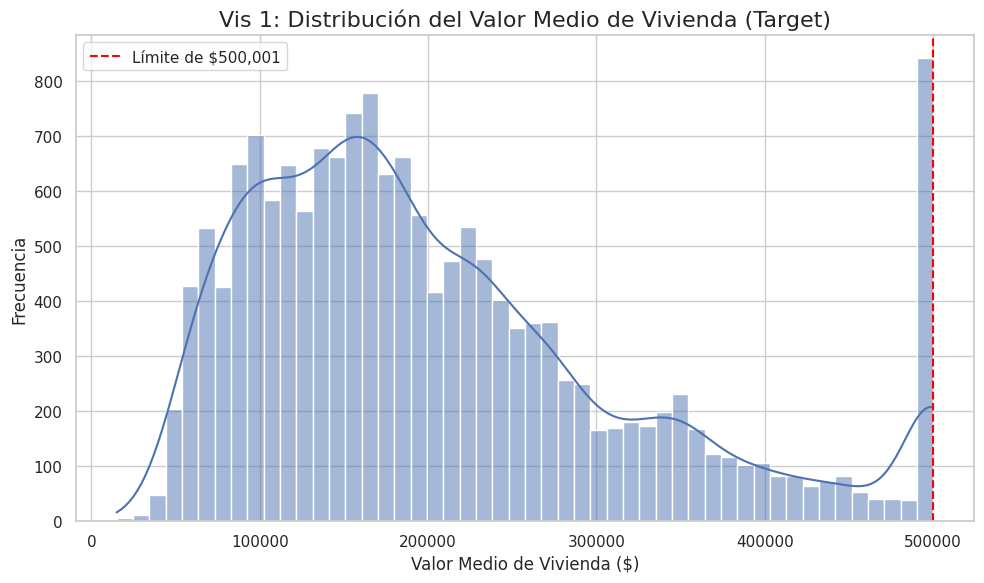

Vis 2: Histograma de 'median_income' guardado.


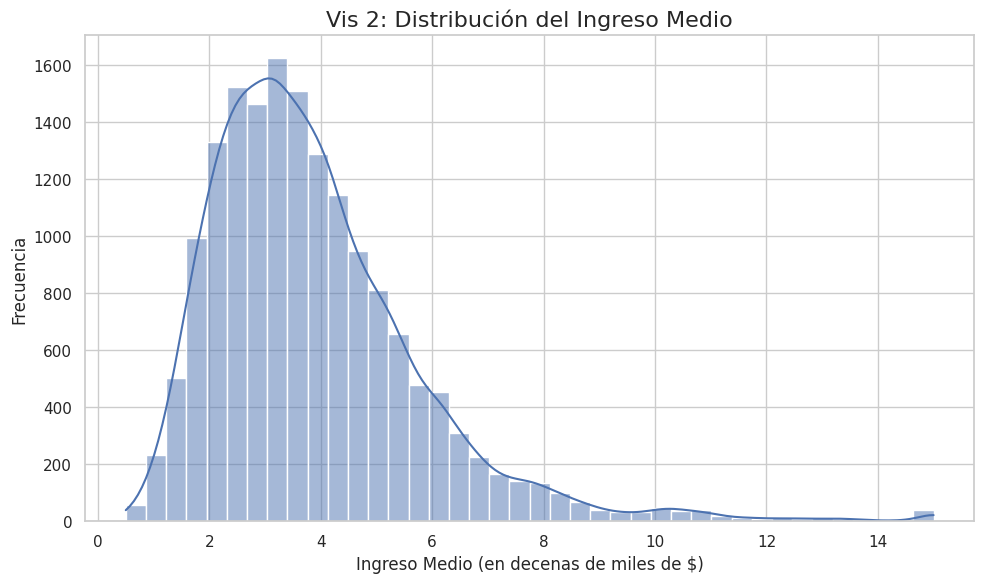

Vis 3: Gráfico de barras de 'ocean_proximity' guardado.


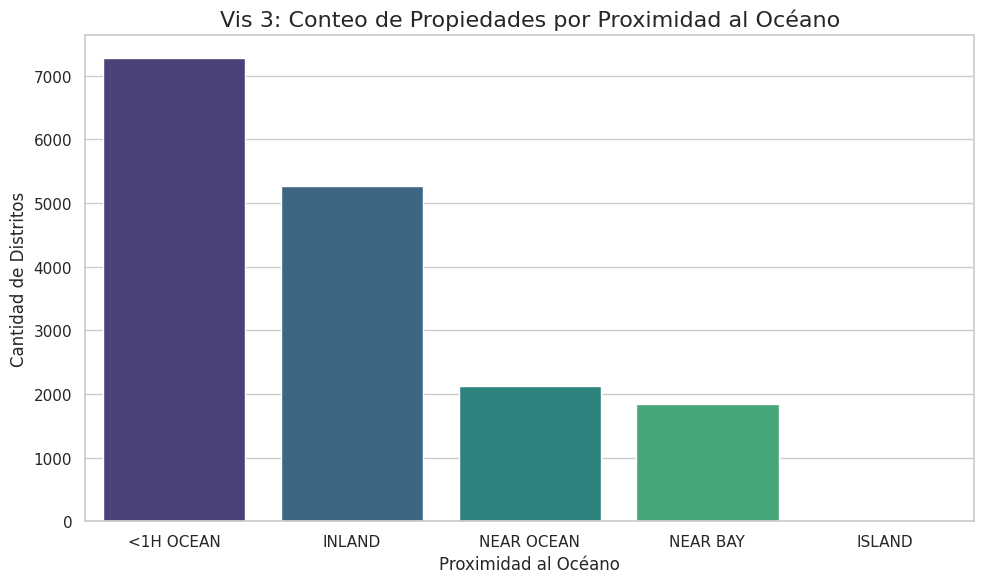

Vis 4: Scatter plot geográfico guardado.


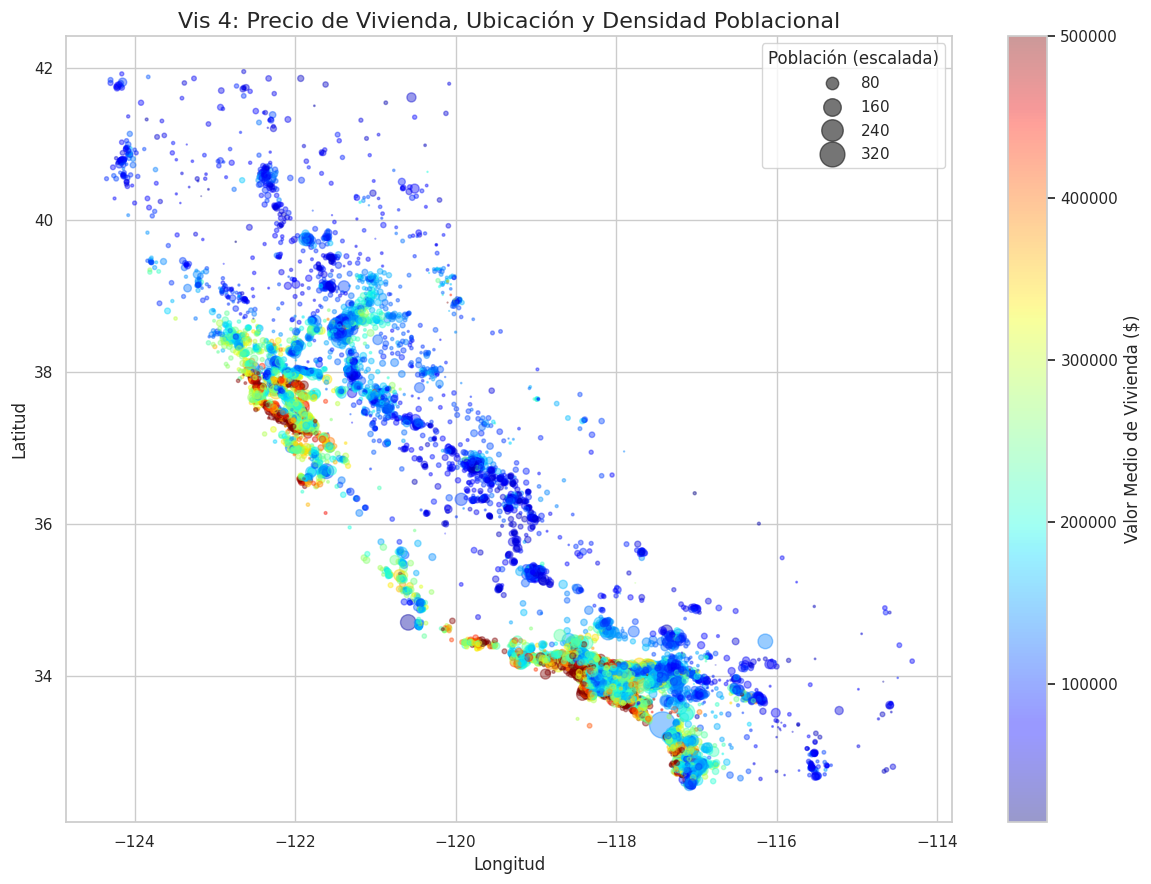

Vis 5: Scatter plot Ingreso vs Precio guardado.


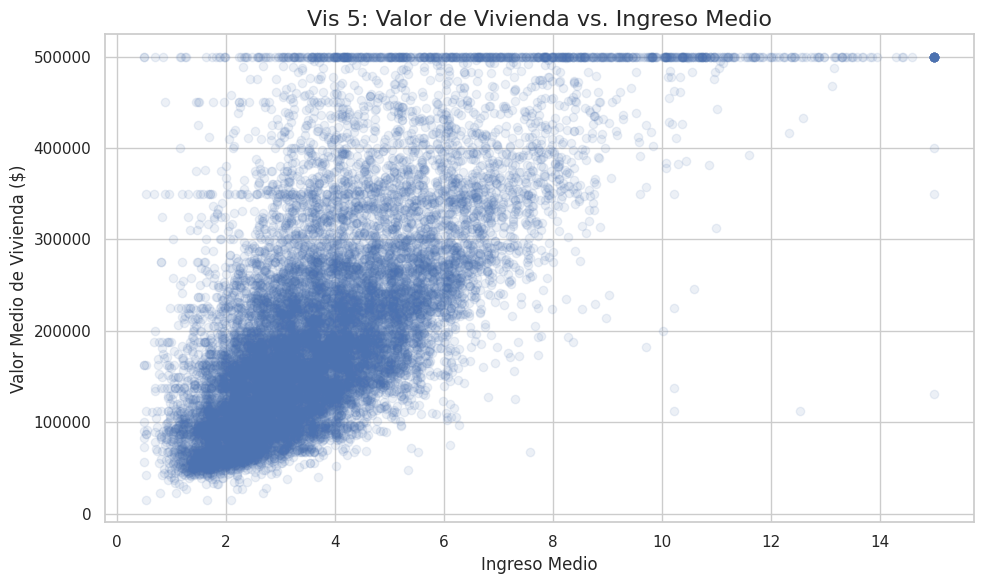

Vis 6: Box plot Proximidad vs Precio guardado.


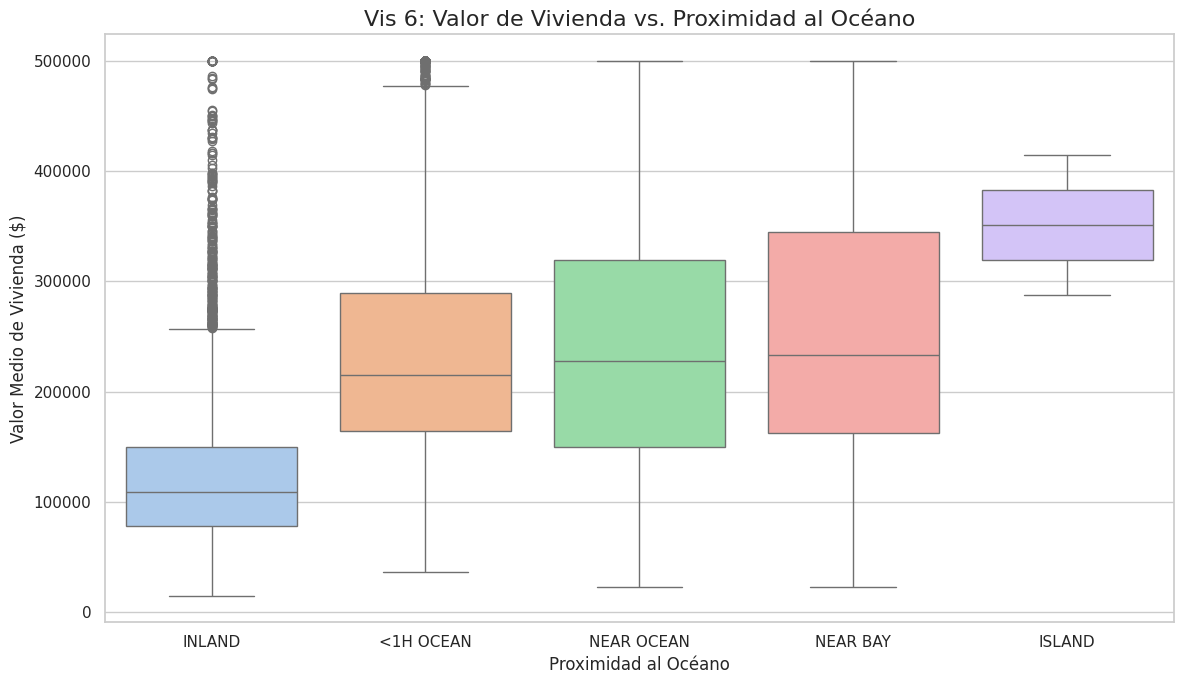

Vis 7: Scatter plot Variable de Ingeniería vs Precio guardado.


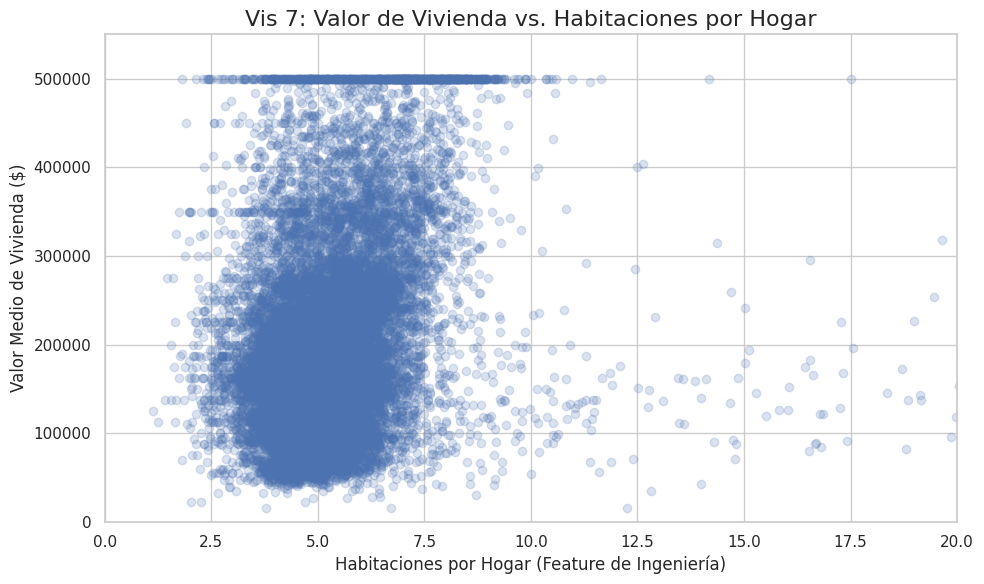

Vis 8: Heatmap de correlación guardado.


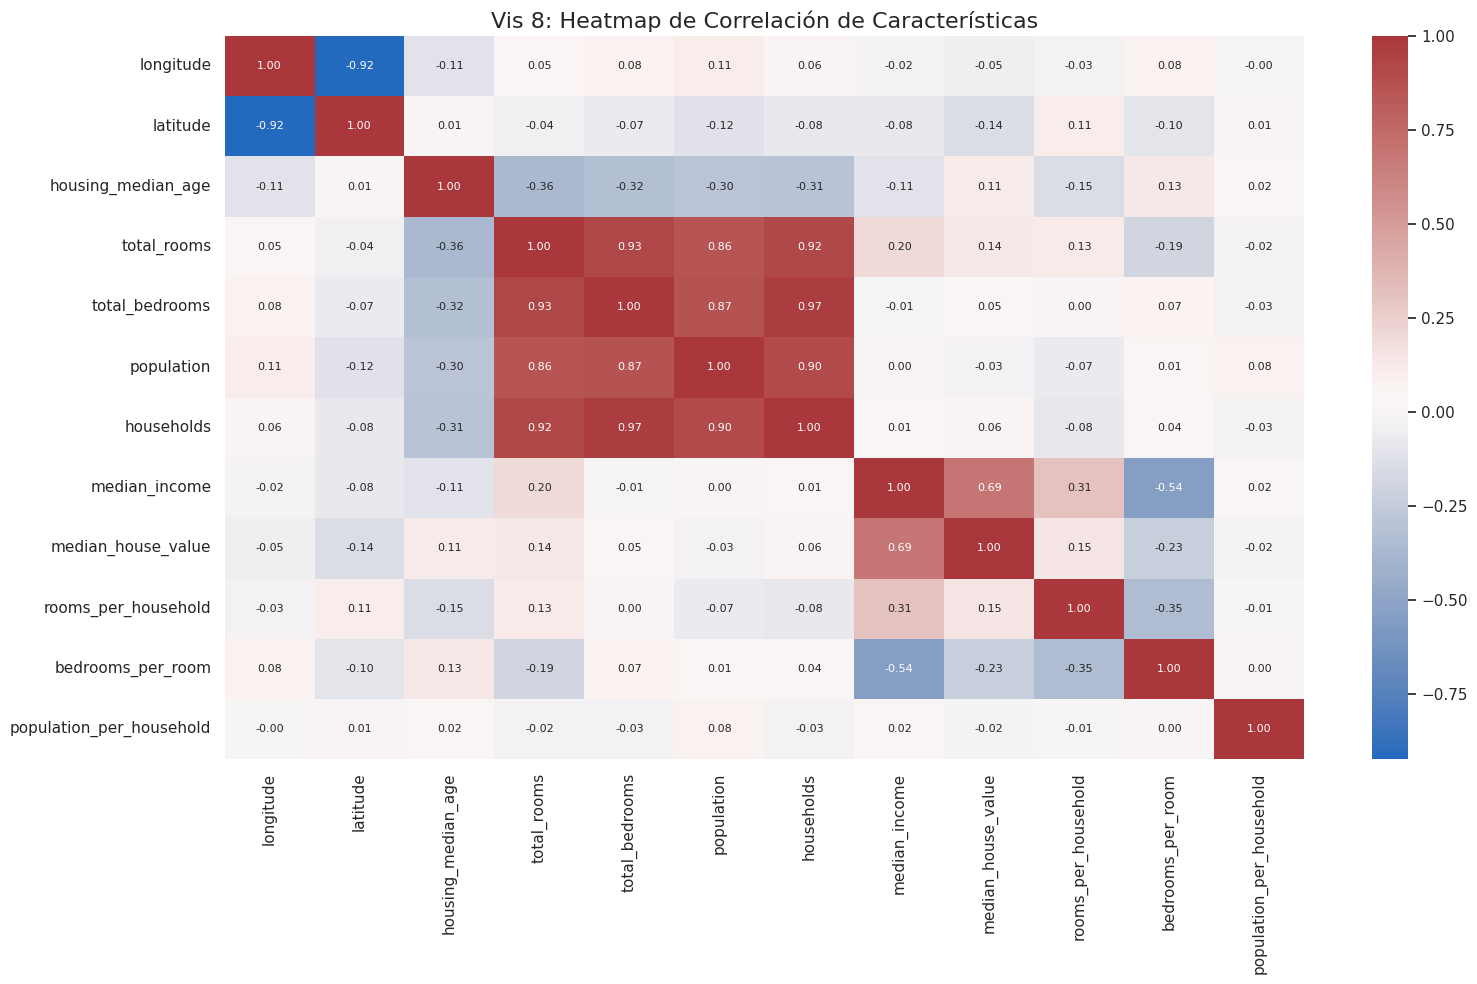


Fase 4 completada. Se generaron 8 visualizaciones.


In [22]:
#@title Fase 4: Análisis Exploratorio y Visualización (EDA)
print("--- Iniciando Fase 4: Análisis Exploratorio y Visualización ---")

# Cargamos el conjunto de entrenamiento que acabamos de crear
try:
    train_data = pd.read_csv('train_set.csv')
    print("'train_set.csv' cargado exitosamente.")
except FileNotFoundError:
    print("Error: 'train_set.csv' no encontrado.")
    # exit() # En Colab, podemos simplemente parar la celda

# --- Preparación para gráficos ---
train_copy = train_data.copy()

# 1. Imputación (solo para el heatmap y scatter de features nuevas)
median_bedrooms = train_copy['total_bedrooms'].median()
train_copy['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# 2. Feature Engineering (solo para el heatmap y scatter de features nuevas)
train_copy['rooms_per_household'] = train_copy['total_rooms'] / (train_copy['households'] + 1e-6)
train_copy['bedrooms_per_room'] = train_copy['total_bedrooms'] / (train_copy['total_rooms'] + 1e-6)
train_copy['population_per_household'] = train_copy['population'] / (train_copy['households'] + 1e-6)

print("Datos preparados para la visualización.")

# --- ANÁLISIS UNIVARIADO ---

# Vis 1: Histograma de la Variable Objetivo (median_house_value)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['median_house_value'], kde=True, bins=50)
plt.title('Vis 1: Distribución del Valor Medio de Vivienda (Target)', fontsize=16)
plt.xlabel('Valor Medio de Vivienda ($)')
plt.ylabel('Frecuencia')
plt.axvline(500001, color='red', linestyle='--', label='Límite de $500,001')
plt.legend()
plt.tight_layout()
plt.savefig('vis1_price_histogram.png')
print("Vis 1: Histograma de 'median_house_value' guardado.")
plt.show()

# Vis 2: Histograma del Predictor Clave (median_income)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['median_income'], kde=True, bins=40)
plt.title('Vis 2: Distribución del Ingreso Medio', fontsize=16)
plt.xlabel('Ingreso Medio (en decenas de miles de $)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('vis2_income_histogram.png')
print("Vis 2: Histograma de 'median_income' guardado.")
plt.show()

# Vis 3: Conteo de Proximidad al Océano (Categórica)
plt.figure(figsize=(10, 6))
order = train_data['ocean_proximity'].value_counts().index
sns.countplot(data=train_data, x='ocean_proximity', order=order, palette='viridis')
plt.title('Vis 3: Conteo de Propiedades por Proximidad al Océano', fontsize=16)
plt.xlabel('Proximidad al Océano')
plt.ylabel('Cantidad de Distritos')
plt.tight_layout()
plt.savefig('vis3_ocean_proximity_bar.png')
print("Vis 3: Gráfico de barras de 'ocean_proximity' guardado.")
plt.show()

# --- ANÁLISIS BIVARIADO Y MULTIVARIADO ---

# Vis 4: Scatter Plot Geográfico (Multivariado)
plt.figure(figsize=(12, 9))
sc = plt.scatter(train_data['longitude'], train_data['latitude'],
            alpha=0.4,
            s=train_data['population']/100,  # Tamaño del punto por población
            label='Population',
            c=train_data['median_house_value'], # Color por precio
            cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(sc)
cbar.set_label('Valor Medio de Vivienda ($)')
plt.title('Vis 4: Precio de Vivienda, Ubicación y Densidad Poblacional', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
handles, labels = sc.legend_elements(prop="sizes", alpha=0.6, num=5)
plt.legend(handles, labels, loc="upper right", title="Población (escalada)")
plt.tight_layout()
plt.savefig('vis4_geo_scatterplot.png')
print("Vis 4: Scatter plot geográfico guardado.")
plt.show()

# Vis 5: Scatter Plot - Ingreso vs Precio (Bivariado)
plt.figure(figsize=(10, 6))
plt.scatter(train_data['median_income'], train_data['median_house_value'], alpha=0.1)
plt.title('Vis 5: Valor de Vivienda vs. Ingreso Medio', fontsize=16)
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de Vivienda ($)')
plt.tight_layout()
plt.savefig('vis5_income_vs_price_scatter.png')
print("Vis 5: Scatter plot Ingreso vs Precio guardado.")
plt.show()

# Vis 6: Box Plot - Proximidad al Océano vs Precio (Bivariado Categórico)
plt.figure(figsize=(12, 7))
sorted_order = train_data.groupby('ocean_proximity')['median_house_value'].median().sort_values().index
sns.boxplot(data=train_data, x='ocean_proximity', y='median_house_value', order=sorted_order, palette='pastel')
plt.title('Vis 6: Valor de Vivienda vs. Proximidad al Océano', fontsize=16)
plt.xlabel('Proximidad al Océano')
plt.ylabel('Valor Medio de Vivienda ($)')
plt.tight_layout()
plt.savefig('vis6_ocean_vs_price_boxplot.png')
print("Vis 6: Box plot Proximidad vs Precio guardado.")
plt.show()

# Vis 7: Scatter Plot - Variable de Ingeniería vs Precio (Bivariado)
plt.figure(figsize=(10, 6))
plt.scatter(train_copy['rooms_per_household'], train_copy['median_house_value'], alpha=0.2)
plt.xlim(0, 20)
plt.ylim(0, 550000)
plt.title('Vis 7: Valor de Vivienda vs. Habitaciones por Hogar', fontsize=16)
plt.xlabel('Habitaciones por Hogar (Feature de Ingeniería)')
plt.ylabel('Valor Medio de Vivienda ($)')
plt.tight_layout()
plt.savefig('vis7_rooms_per_household_scatter.png')
print("Vis 7: Scatter plot Variable de Ingeniería vs Precio guardado.")
plt.show()

# --- ANÁLISIS DE CORRELACIÓN ---

# Vis 8: Heatmap de Correlación
plt.figure(figsize=(16, 10))
# Usamos 'train_copy' (con features nuevas) y aplicamos One-Hot Encoding
train_copy_processed = pd.get_dummies(train_copy, columns=['ocean_proximity'], prefix='ocean_proximity')
# Seleccionamos solo columnas numéricas
numeric_cols = train_copy_processed.select_dtypes(include=[np.number])
# Calculamos la matriz de correlación
corr_matrix = numeric_cols.corr()
# Creamos el heatmap con anotaciones ('annot=True')
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt='.2f', annot_kws={"size": 8})
plt.title('Vis 8: Heatmap de Correlación de Características', fontsize=16)
plt.tight_layout()
plt.savefig('vis8_correlation_heatmap.png')
print("Vis 8: Heatmap de correlación guardado.")
plt.show()

print("\nFase 4 completada. Se generaron 8 visualizaciones.")

Paso 7: Modelado y Selección de Modelo **(FASE 5)**

--- Iniciando Fase 5: Modelado ---
Cargando datos...
Datos cargados exitosamente.

--- Entrenando Modelo 1: Regresión Lineal ---
Regresión Lineal RMSE (CV 10-fold): $75,021.25

--- Entrenando Modelo 2: Árbol de Decisión (Regressor) ---
Árbol de Decisión Mejor RMSE (GridSearchCV): $74,267.68
Árbol de Decisión Mejores Parámetros: {'max_depth': 5, 'min_samples_leaf': 2}

--- Entrenando Modelo 3: Random Forest (Regressor) ---
Random Forest Mejor RMSE (GridSearchCV): $67,842.70
Random Forest Mejores Parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}

--- Comparación de Modelos e Interpretabilidad ---
El modelo con mejor rendimiento es: Random Forest con un RMSE de $67,842.70

Top 10 Importancia de Características del Modelo Final (Random Forest):
                       feature  importance
3                median_income    0.277274
8       ocean_proximity_INLAND    0.137168
6     population_per_household    0.116042
5            bedrooms_per_room    0.110134
0        

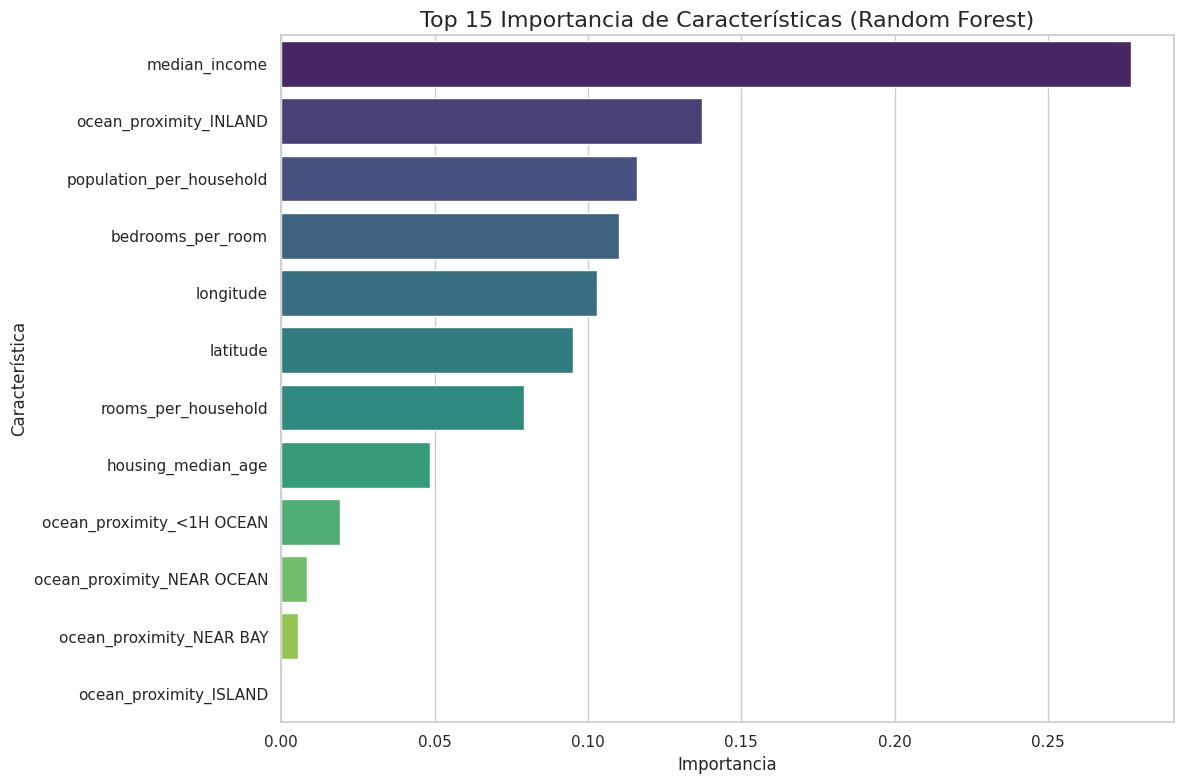

Parámetros finales guardados para Fase 6: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


In [23]:
#@title Fase 5: Modelado y Optimización
print("--- Iniciando Fase 5: Modelado ---")

# --- 1. Cargar y Preparar Datos ---
print("Cargando datos...")
try:
    df_clean = pd.read_csv("datos_limpios.csv")
except FileNotFoundError:
    print("Error: 'datos_limpios.csv' no encontrado.")
    # exit()

# Separar características (X) y objetivo (y)
X_train = df_clean.drop("median_house_value", axis=1)
y_train = df_clean["median_house_value"]

# Obtener nombres de las características para usarlos después
feature_names = X_train.columns.tolist()
print("Datos cargados exitosamente.")

# --- 2. Modelo 1: Regresión Lineal (Línea Base) ---
print("\n--- Entrenando Modelo 1: Regresión Lineal ---")
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse = -lin_scores.mean()
print(f"Regresión Lineal RMSE (CV 10-fold): ${lin_rmse:,.2f}")

# --- 3. Modelo 2: Árbol de Decisión (con Búsqueda de Hiperparámetros) ---
print("\n--- Entrenando Modelo 2: Árbol de Decisión (Regressor) ---")
tree_reg = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [2, 5, 10]
}
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=5,
                                scoring='neg_root_mean_squared_error',
                                return_train_score=True, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
tree_rmse = -grid_search_tree.best_score_
print(f"Árbol de Decisión Mejor RMSE (GridSearchCV): ${tree_rmse:,.2f}")
print(f"Árbol de Decisión Mejores Parámetros: {grid_search_tree.best_params_}")

# --- 4. Modelo 3: Random Forest (con Búsqueda de Hiperparámetros) ---
print("\n--- Entrenando Modelo 3: Random Forest (Regressor) ---")
forest_reg = RandomForestRegressor(random_state=42)
param_grid_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 1.0]
}
grid_search_forest = GridSearchCV(forest_reg, param_grid_forest, cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  return_train_score=True, n_jobs=-1)
grid_search_forest.fit(X_train, y_train)
forest_rmse = -grid_search_forest.best_score_
print(f"Random Forest Mejor RMSE (GridSearchCV): ${forest_rmse:,.2f}")
print(f"Random Forest Mejores Parámetros: {grid_search_forest.best_params_}")

# --- 5. Selección Final de Modelo e Interpretabilidad ---
print("\n--- Comparación de Modelos e Interpretabilidad ---")
results = {
    "Regresión Lineal": lin_rmse,
    "Árbol de Decisión": tree_rmse,
    "Random Forest": forest_rmse
}
best_model_name = min(results, key=results.get)
best_rmse = results[best_model_name]
print(f"El modelo con mejor rendimiento es: {best_model_name} con un RMSE de ${best_rmse:,.2f}")

# Para la interpretabilidad, nos enfocamos en el mejor modelo (Random Forest)
final_model = grid_search_forest.best_estimator_

# Obtener la importancia de las características
importances = final_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Importancia de Características del Modelo Final (Random Forest):")
print(feature_importance_df.head(10))

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Importancia de Características (Random Forest)', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importances.png')
print("\nGráfico de importancia de características guardado como 'feature_importances.png'")
plt.show()

# Guardar los mejores parámetros para la siguiente fase
# (Basado en tu documento, los parámetros pueden variar ligeramente en cada corrida)
final_params_rf = grid_search_forest.best_params_
print(f"Parámetros finales guardados para Fase 6: {final_params_rf}")

Paso 8: Evaluación Final en Conjunto de Prueba **(FASE 6)**

In [24]:
#@title Fase 6: Evaluación Final en 'test_set.csv'
print("--- Iniciando Fase 6: Evaluación Final ---")

# --- 1. Función de Procesamiento de Datos ---
def process_data(df):
    """Limpia, imputa y crea características para el set de datos."""

    # Imputar 'total_bedrooms' con la mediana
    imputer = SimpleImputer(strategy="median")
    df_processed = df.copy()
    df_processed[['total_bedrooms']] = imputer.fit_transform(df_processed[['total_bedrooms']])

    # 2. Creación de nuevas características
    df_processed["rooms_per_household"] = df_processed["total_rooms"] / df_processed["households"]
    df_processed["bedrooms_per_room"] = df_processed["total_bedrooms"] / df_processed["total_rooms"]
    df_processed["population_per_household"] = df_processed["population"] / df_processed["households"]

    # 3. One-Hot Encoding
    df_processed = pd.get_dummies(df_processed, columns=['ocean_proximity'], prefix='ocean_proximity')

    # 4. Eliminar columnas originales
    df_processed = df_processed.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

    return df_processed

# --- 2. Cargar Datos ---
print("Cargando datos...")
try:
    # Set de entrenamiento (ya limpio y procesado)
    df_train_clean = pd.read_csv("datos_limpios.csv")
    # Set de prueba (raw, necesita procesamiento)
    df_test_raw = pd.read_csv("test_set.csv")
except FileNotFoundError as e:
    print(f"Error: No se pudo encontrar el archivo {e.filename}.")
    # exit()
print("Datos cargados.")

# --- 3. Preparar Datos de Entrenamiento (de datos_limpios.csv) ---
X_train = df_train_clean.drop("median_house_value", axis=1)
y_train = df_train_clean["median_house_value"]
train_columns = X_train.columns.tolist()

# --- 4. Procesar y Preparar Datos de Prueba (de test_set.csv) ---
print("Procesando el conjunto de prueba (test_set.csv)...")
df_test_processed = process_data(df_test_raw)

# Separar X_test y y_test
# Asegurarnos de que 'median_house_value' exista antes de dropearla
if 'median_house_value' in df_test_processed.columns:
    X_test = df_test_processed.drop("median_house_value", axis=1)
    y_test = df_test_processed["median_house_value"]
else:
    print("Error: 'median_house_value' no se encontró en el test set procesado.")
    # Parar la celda si hay un problema

# --- 5. Alinear Columnas ---
print("Alineando columnas entre train y test...")
X_test_aligned = X_test.reindex(columns=train_columns, fill_value=0)
X_test_aligned = X_test_aligned[train_columns]

# --- 6. Entrenar y Evaluar el Modelo Final ---
print("Entrenando el modelo final con los mejores parámetros...")

# Usamos los parámetros óptimos encontrados en la Fase 5
# (final_params_rf) o los definimos manualmente si es necesario
if 'final_params_rf' not in globals():
     print("Usando parámetros por defecto de tu documento.")
     # (Tomados de tu fuente 190, aunque estos pueden variar)
     final_params_rf = {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}

final_model_rf = RandomForestRegressor(random_state=42, **final_params_rf)

# Entrenamos el modelo con TODOS los datos de entrenamiento
final_model_rf.fit(X_train, y_train)

print("Evaluando el modelo en el conjunto de prueba...")
test_predictions = final_model_rf.predict(X_test_aligned)

# Calcular el error final (RMSE)
final_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("\n--- ¡Evaluación Final Completada! ---")
# Imprimimos el RMSE de CV de la celda anterior para comparar
print(f"El RMSE en el conjunto de entrenamiento (CV) fue: ${best_rmse:,.2f}")
print(f"El RMSE FINAL en el conjunto de prueba es:     ${final_rmse:,.2f}")

--- Iniciando Fase 6: Evaluación Final ---
Cargando datos...
Datos cargados.
Procesando el conjunto de prueba (test_set.csv)...
Alineando columnas entre train y test...
Entrenando el modelo final con los mejores parámetros...
Evaluando el modelo en el conjunto de prueba...

--- ¡Evaluación Final Completada! ---
El RMSE en el conjunto de entrenamiento (CV) fue: $67,842.70
El RMSE FINAL en el conjunto de prueba es:     $18,596.00
